In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [1]:
!pip install scikit-learn==1.3.0

# LOADING THE DATASET

In [3]:
# LOAD THE CSV DATA
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# deleting id column
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# display basic stats of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# PREPROCESSING DATASET

In [8]:
# check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# DATA ANALYSIS

<Axes: >

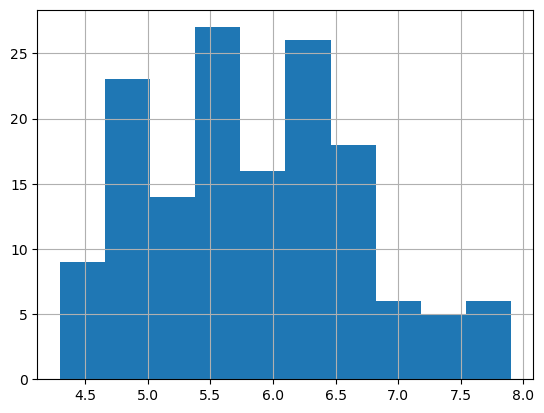

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

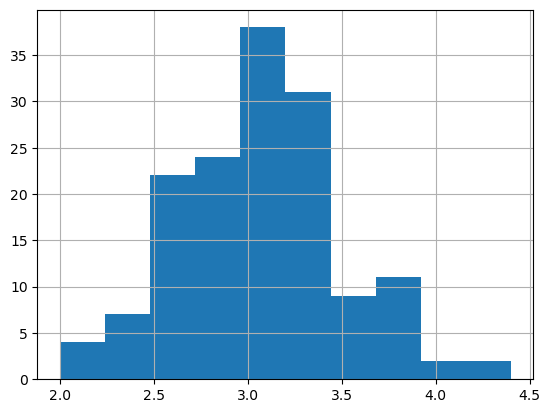

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

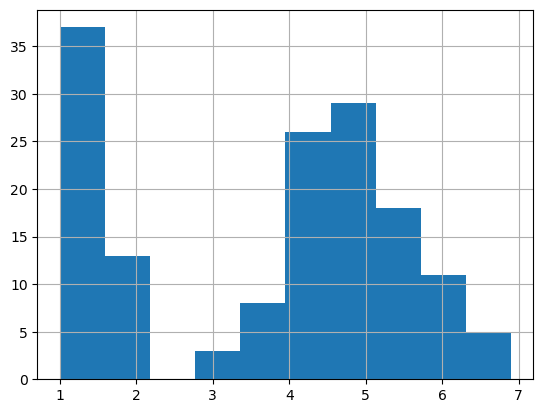

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

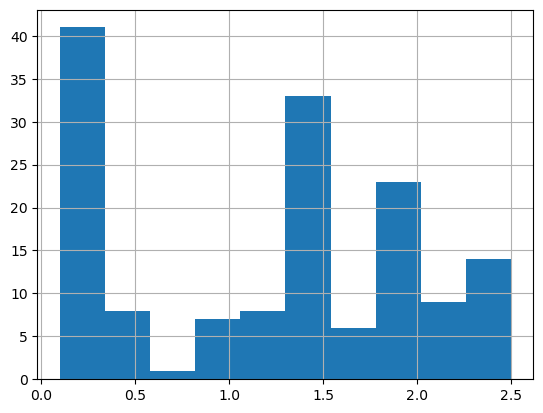

In [12]:
df['PetalWidthCm'].hist()

In [13]:
# create list of colors and class labels
colors = ['red','orange','blue']
species= ['virginica', 'versicolor','setosa']

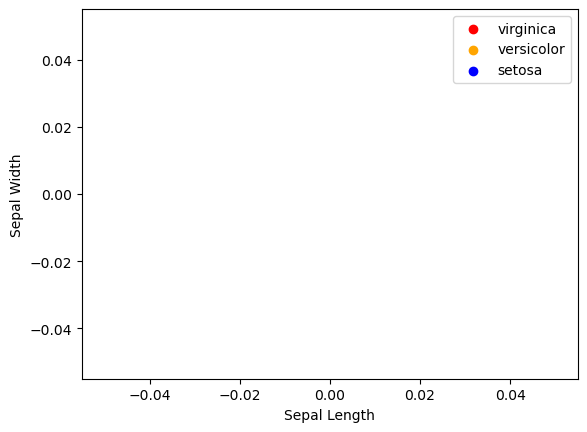

In [14]:
for i in range(3):
    # filter data on each class
    x=df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

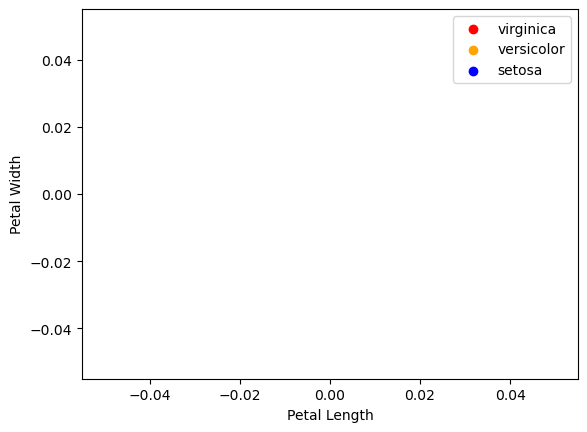

In [15]:
for i in range(3):
    # filter data on each class
    x=df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

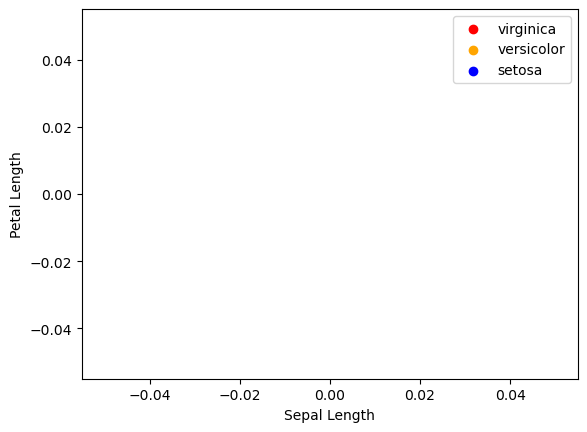

In [16]:
for i in range(3):
    # filter data on each class
    x=df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

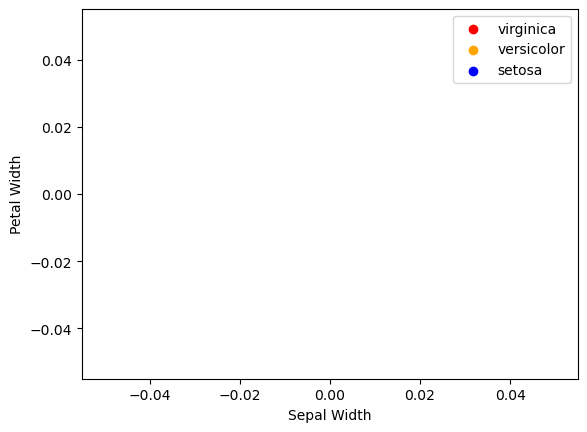

In [17]:
for i in range(3):
    # filter data on each class
    x=df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# CORRELATION MATRIX 

In [18]:
# display the correlation data
subset_df = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
subset_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

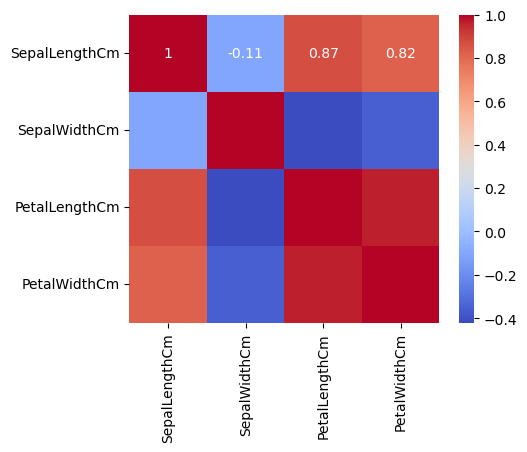

In [19]:
corr=subset_df.corr()
# plot the heat map
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True, ax=ax, cmap='coolwarm')

# MODEL TRAINING AND TESTING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# Input Data
X=df.drop(columns=['Species'])
# output data
Y=df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [23]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)*100)

Logistic Regression Accuracy:  91.11111111111111


In [24]:
#model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [25]:
#print metric to get Performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  91.11111111111111


In [26]:
# K-nearest neighbours
model=KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ",model.score(x_test, y_test)*100)

K-nearest neighbors Accuracy:  95.55555555555556


In [27]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [28]:
# print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [29]:
#decision tree
model=DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ",model.score(x_test,y_test)*100)

Decision Tree Accuracy:  91.11111111111111


In [30]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [31]:
# print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  91.11111111111111


In [32]:
# save the model
filename='saved_model.sav'
pickle.dump(model,open(filename,'wb'))
    

In [33]:
#save the updated model
filename='saved_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model,file)
    print("Model Saved Succesfully")
except Exception as e:
    print("Error Saving the Model: {e}")

Model Saved Succesfully


In [34]:
load_model=pickle.load(open(filename,'rb'))


In [35]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)